In [1]:
from pyke import KeplerTargetPixelFile
%matplotlib inline

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from oktopus import UniformPrior, JointPrior

In [5]:
from pyke import PRFPhotometry, SceneModel
from pyke.utils import KeplerQualityFlags

In [6]:
tpf = KeplerTargetPixelFile('https://archive.stsci.edu/missions/k2/target_pixel_files/c12/246100000/99000/ktwo246199087-c12_lpd-targ.fits.gz',
                            quality_mask=KeplerQualityFlags.HARDEST_BITMASK)

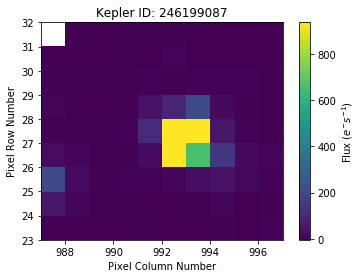

In [7]:
tpf.plot()

In [8]:
prf = tpf.get_prf_model()

In [9]:
prior_column = UniformPrior(lb=990, ub=996, name='column')
prior_row = UniformPrior(lb=25, ub=30, name='row')
prior_flux = UniformPrior(lb=4e3, ub=2e4, name='flux')
prior_bkg = UniformPrior(lb=1, ub=2e3, name='bkg')

In [10]:
prior = JointPrior(prior_flux, prior_column, prior_row, prior_bkg)

In [11]:
scene = SceneModel(prfs=[prf])

In [12]:
phot = PRFPhotometry(scene_model=scene, prior=prior)

In [13]:
results = phot.fit(tpf.flux + tpf.flux_bkg)

  0%|          | 0/3379 [00:00<?, ?it/s]/Users/jvmirca/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in log
  return f_raw(*args, **kwargs)
 35%|███▍      | 1175/3379 [00:48<01:31, 24.21it/s]/Users/jvmirca/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1850: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
 35%|███▍      | 1178/3379 [00:48<01:30, 24.20it/s]/Users/jvmirca/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1851: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/Users/jvmirca/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1852: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = 2.0 * (tmp2 - tmp1)
100%|██████████| 3379/3379 [02:23<00:00, 23.49it/s]


In [14]:
flux = results[:, 0]
col = results[:, 1]
row = results[:, 2]
bkg = results[:, 3]

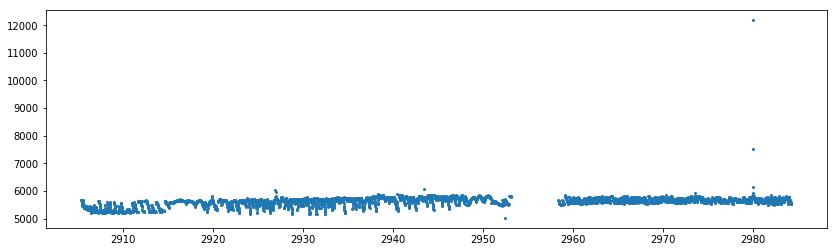

In [15]:
plt.figure(figsize=[14, 4])
plt.plot(tpf.time, flux, 'o', markersize=2)

In [16]:
q = tpf.time < 2956

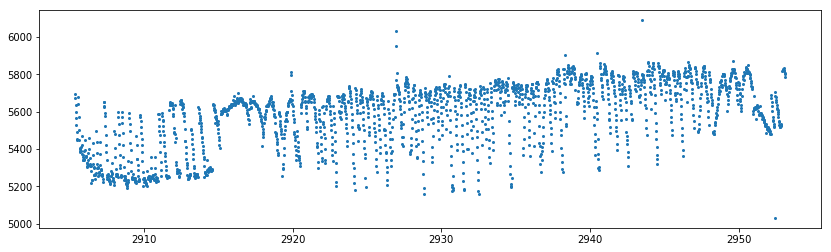

In [17]:
plt.figure(figsize=[14, 4])
plt.plot(tpf.time[q], flux[q], 'o', markersize=2)

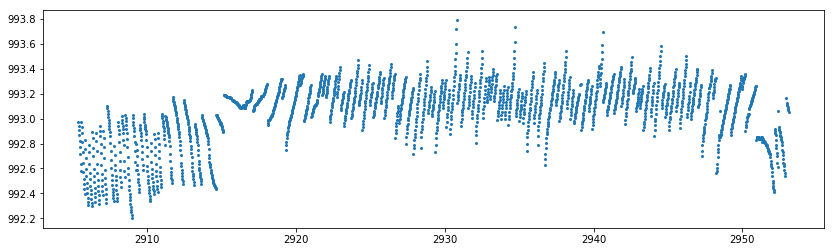

In [18]:
plt.figure(figsize=[14, 4])
plt.plot(tpf.time[q], col[q], 'o', markersize=2)

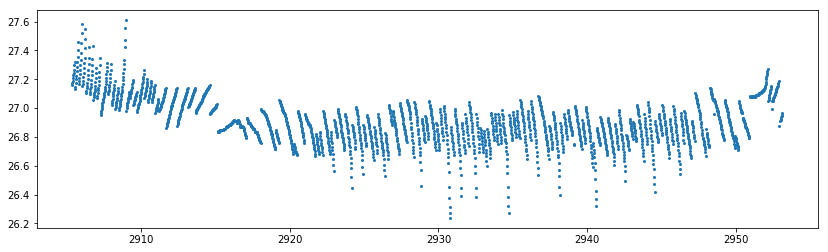

In [19]:
plt.figure(figsize=[14, 4])
plt.plot(tpf.time[q], row[q], 'o', markersize=2)

In [20]:
from pyke.lightcurve import SFFDetrender

/Users/jvmirca/dev/PyKE/pyke/lightcurve.py:525: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(self.rot_row, self.rot_col, self.poly_order)


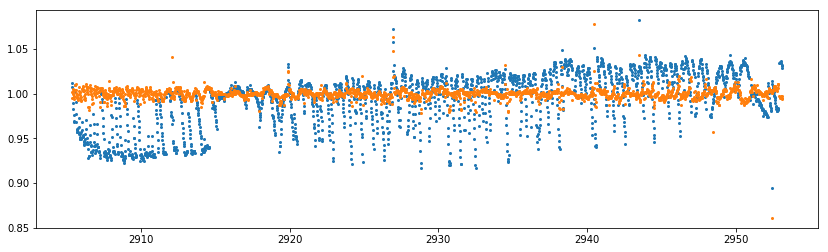

In [21]:
sff = SFFDetrender(niters=10)
flux_detrended = sff.detrend(tpf.time[q], flux[q], col[q], row[q])
plt.figure(figsize=[14, 4])
plt.plot(tpf.time[q], flux[q]/np.median(flux[q]), 'o', markersize=2)
plt.plot(tpf.time[q], flux_detrended, 'o', markersize=2)

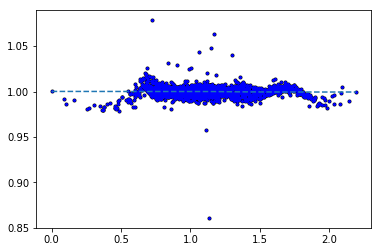

In [22]:
sff.plot_normflux_arclength()

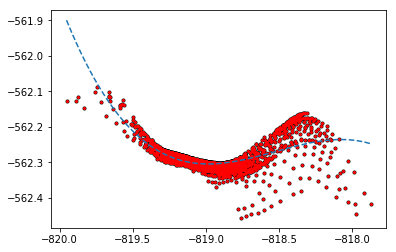

In [23]:
sff.plot_rotated_centroids()

/Users/jvmirca/dev/PyKE/pyke/lightcurve.py:525: RankWarning: Polyfit may be poorly conditioned
  coeffs = np.polyfit(self.rot_row, self.rot_col, self.poly_order)


(0.9, 1.1)

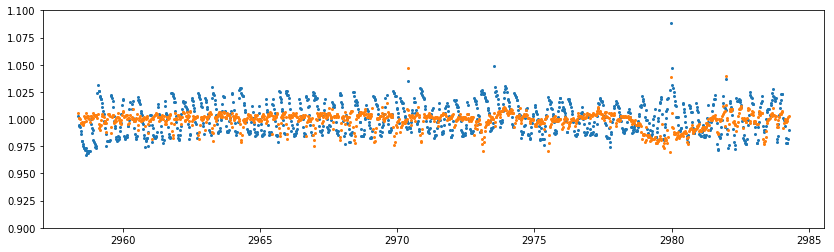

In [24]:
sff = SFFDetrender(niters=10)
flux_detrended = sff.detrend(tpf.time[~q], flux[~q], col[~q], row[~q])
plt.figure(figsize=[14, 4])
plt.plot(tpf.time[~q], flux[~q]/np.median(flux[~q]), 'o', markersize=2)
plt.plot(tpf.time[~q], flux_detrended, 'o', markersize=2)
plt.ylim(.9, 1.1)

(0.9, 1.1)

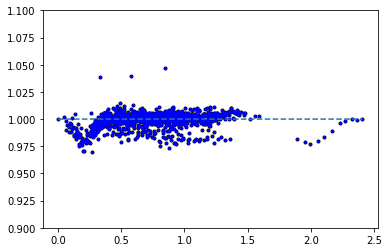

In [25]:
sff.plot_normflux_arclength()
plt.ylim([.9, 1.1])

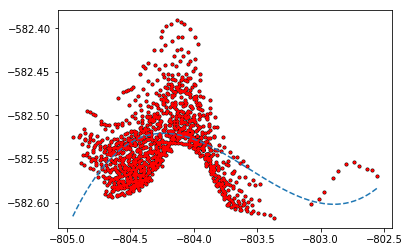

In [26]:
sff.plot_rotated_centroids()